In [850]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


In [851]:
costa_rica = pd.read_csv("../final_data")
costa_rica = costa_rica.drop(columns = ["Id", "idhogar"])
costa_rica

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,avg_dis,avg_escolari,min_escolari,max_escolari,avg_behind_school,min_behind_school,max_behind_school,avg_age,min_age,max_age
0,190000.00,0,3,0,1,1,0,NaN,0,1,...,0.00,10.00,10,10,NaN,NaN,NaN,43.00,43,43
1,135000.00,0,4,0,1,1,1,1.00,0,1,...,0.00,12.00,12,12,NaN,NaN,NaN,67.00,67,67
2,NaN,0,8,0,1,1,0,NaN,0,0,...,1.00,11.00,11,11,NaN,NaN,NaN,92.00,92,92
3,180000.00,0,5,0,1,1,1,1.00,0,2,...,0.00,8.25,2,11,0.50,0.00,1.00,25.00,8,38
4,130000.00,1,2,0,1,1,0,NaN,0,1,...,0.00,5.75,0,11,0.50,0.00,1.00,19.00,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,NaN,0,4,0,1,0,0,NaN,1,1,...,0.00,1.80,0,5,1.00,1.00,1.00,15.00,6,29
2969,NaN,0,3,0,0,0,0,NaN,2,2,...,0.40,3.40,0,6,0.00,0.00,0.00,19.60,2,40
2970,46500.00,0,5,0,1,1,0,NaN,1,2,...,0.00,6.00,0,11,NaN,NaN,NaN,26.80,2,46
2971,NaN,0,3,0,1,1,0,NaN,0,1,...,0.00,3.00,0,6,NaN,NaN,NaN,64.00,61,67


In [852]:
# Split data into train, validation, and test sets with 70/10/20 split
train, test = train_test_split(costa_rica, test_size=0.3, random_state = 0)
valid, test = train_test_split(test, test_size=0.1, random_state = 0)
x_train = train.drop(columns = ["Target"])
y_train = train["Target"]
x_test = test.drop(columns = ["Target"])
y_test = test["Target"]
x_valid = valid.drop(columns = ["Target"])
y_valid = valid["Target"]

In [853]:
# Use variance threshold to find most important features
threshold = 0.2
sel = VarianceThreshold(threshold)
sel.fit_transform(x_train)
selected_features = sel.get_feature_names_out(x_train.columns)
# Drop unwanted features
x_train = x_train[selected_features]
x_valid = x_valid[selected_features]
x_test = x_test[selected_features]

In [854]:
# Impute missing values
imputer = KNNImputer()
x_train_knn = pd.DataFrame(imputer.fit_transform(x_train), columns=imputer.get_feature_names_out())
x_valid = pd.DataFrame(imputer.fit_transform(x_valid), columns=imputer.get_feature_names_out())

**K-Nearest Neighbors Classifier**

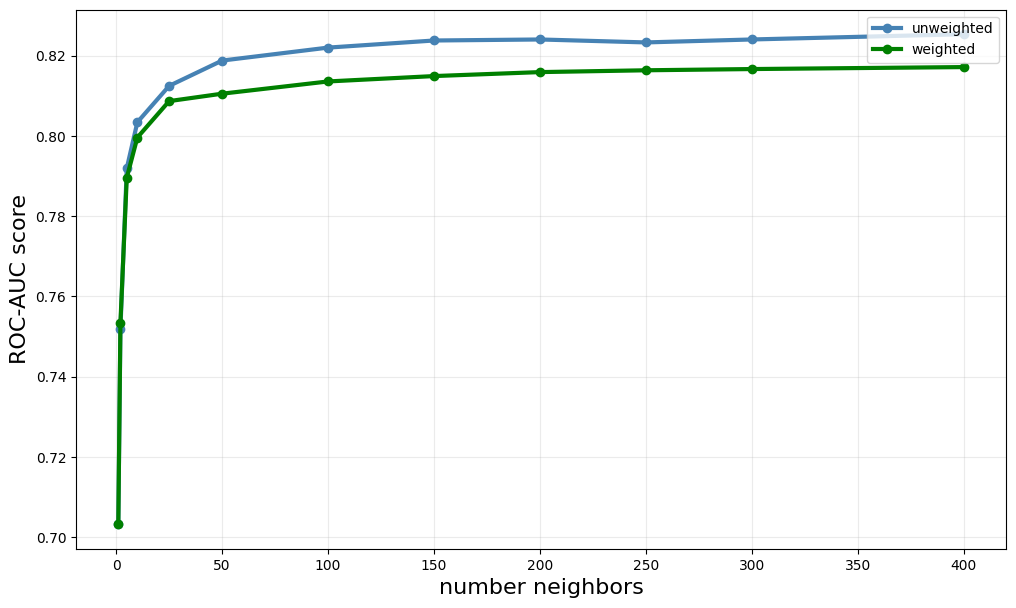

In [855]:
allks= [1,2,5,10,25,50,100,150,200,250,300, 400]
uw_scores = []
w_scores = []

# Unweighted
for k in allks:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_knn, y_train)
    y_pred = knn.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    uw_scores.append(score)

# Weighted
for k in allks:
    knn = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    knn.fit(x_train_knn, y_train)
    y_pred = knn.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    w_scores.append(score)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 7))
ax.plot(allks, uw_scores, marker="o", color="steelblue", lw=3, label="unweighted")
ax.plot(allks, w_scores, marker="o", color="green", lw=3, label="weighted")
ax.set_xlabel("number neighbors", fontsize=16)
ax.set_ylabel("ROC-AUC score", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(0, 401, 50))
ax.grid(alpha=0.25)

In [856]:
print(uw_scores)
print(w_scores)

[0.7032418952618453, 0.7518547770225311, 0.7919296729083359, 0.8033925991339192, 0.8124490830280906, 0.8187557913197059, 0.8219859743824147, 0.8237555011059219, 0.8240096972862938, 0.8232758710041189, 0.8240125476002429, 0.8253192869861921]
[0.7032418952618453, 0.7533853956132116, 0.7895856783643552, 0.7995887256090862, 0.8086532422062052, 0.8105056871536868, 0.813553191004202, 0.8148938750380906, 0.815883193097887, 0.8163356156574483, 0.8166418948472542, 0.8171331853243036]


**Decision Tree**

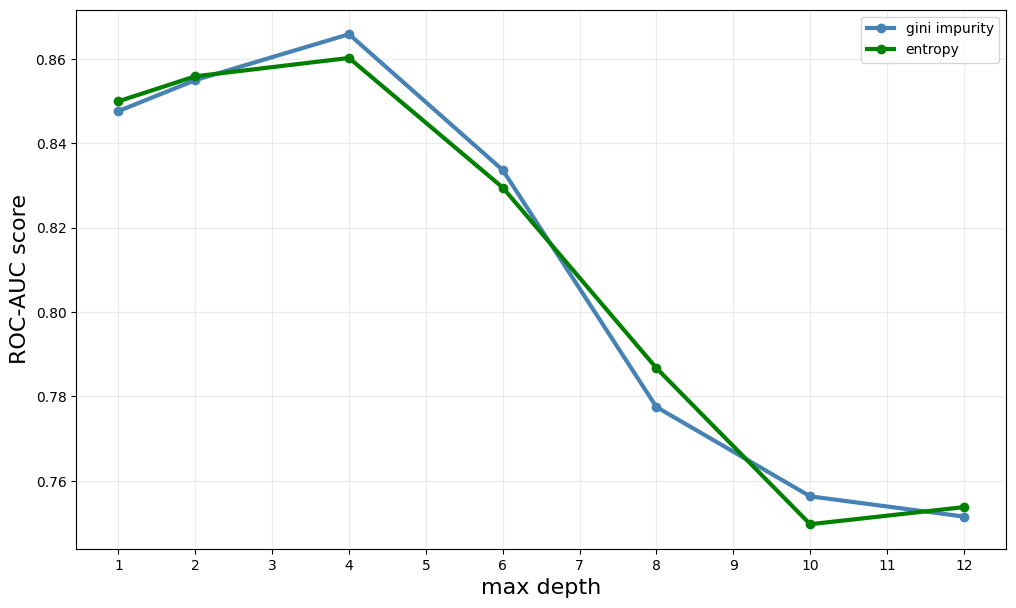

In [857]:
max_depths = [1,2, 4, 6, 8, 10, 12]
gini_score = []
entropy_score = []
gini_trees = {}
entropy_trees = {}

for d in max_depths:
    t = tree.DecisionTreeClassifier(criterion="gini", max_depth = d)
    t.fit(x_train, y_train)
    y_pred = t.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    gini_score.append(score)
    gini_trees[d] = (t, score)

for d in max_depths:
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth = d)
    t.fit(x_train, y_train)
    y_pred = t.predict_proba(x_valid)
    score = roc_auc_score(y_valid, y_pred, multi_class = "ovr", average = "micro")
    entropy_score.append(score)
    entropy_trees[d] = (t, score)

    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12, 7))
ax.plot(max_depths, gini_score, marker="o", color="steelblue", lw=3, label="gini impurity")
ax.plot(max_depths, entropy_score, marker="o", color="green", lw=3, label="entropy")
ax.set_xlabel("max depth", fontsize=16)
ax.set_ylabel("ROC-AUC score", fontsize=16)
ax.legend(loc="upper right")
plt.xticks(range(1, 13, 1))
ax.grid(alpha=0.25)

In [858]:
# Best model is tree with max depth 4 using entropy to split
best_tree = gini_trees[4][0]
best_score = gini_trees[4][1]
print(best_score)

0.8658416821620099


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00807877 0.         0.         0.0108069  0.03043654 0.
 0.         0.         0.00796994 0.         0.02611818 0.03137231
 0.         0.         0.         0.         0.         0.11396318
 0.         0.         0.         0.         0.         0.04144574
 0.         0.         0.         0.         0.         0.
 0.63970387 0.         0.07363996 0.         0.         0.
 0.         0.01646461 0.        ]
['v2a1' 'rooms' 'v18q1' 'r4h1' 'r4h2' 'r4h3' 'r4m1' 'r4m2' 'r4m3' 'r4t1'
 'r4t2' 'r4t3' 'tamviv' 'escolari' 'paredblolad' 'pisomoscer' 'cielorazo'
 'energcocinar2' 'energcocinar3' 'epared2' 'epared3' 'etecho2' 'etecho3'
 'eviv3' 'female' 'estadocivil3' 'hogar_nin' 'hogar_adul' 'hogar_mayor'
 'dependency' 'edjefe' 'edjefa' 'meaneduc' 'instlevel3' 'bedrooms'
 'overcrowding' 'tipovivi1' 'qmobilephone' 'lugar1' 'area1' 'age'
 'num_dis' 'avg_escolari' 'min_escolari' 'ma

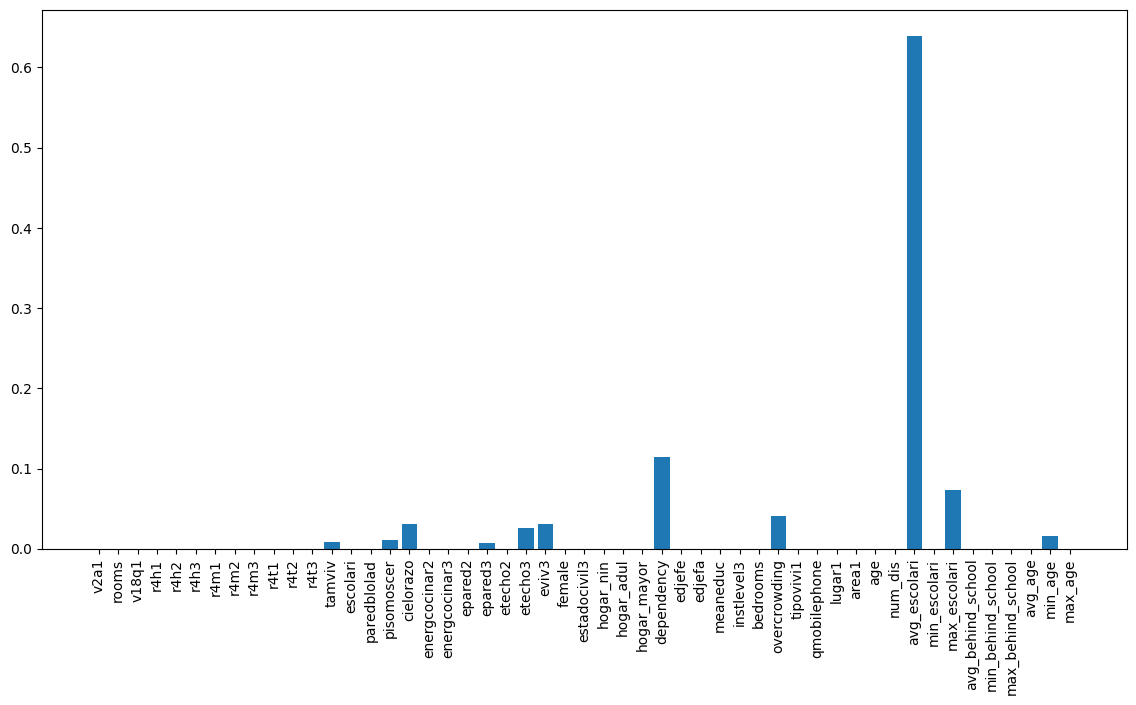

In [859]:
print(best_tree.feature_importances_)
print(best_tree.feature_names_in_)

importances_df = pd.DataFrame({"features" : best_tree.feature_names_in_, 
                               "importance" : best_tree.feature_importances_})
                             
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(14, 7))
plt.bar(importances_df["features"],importances_df["importance"])
ax.tick_params(axis='x', labelsize=10, labelrotation=90)

**Test Data**

In [862]:
x_test_knn = pd.DataFrame(imputer.fit_transform(x_test), columns=imputer.get_feature_names_out())
knn = KNeighborsClassifier(n_neighbors = 150)
knn.fit(x_train_knn, y_train)
y_pred = knn.predict_proba(x_test_knn)
roc_auc_score(y_test, y_pred, multi_class = "ovr", average = "micro")

0.839917695473251

In [863]:
t = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4)
t.fit(x_train, y_train)
y_pred = t.predict_proba(x_test)
roc_auc_score(y_test, y_pred, multi_class = "ovr", average = "micro")

0.8867901234567901